In [9]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split #데이터 전처리 - train, test 분리 random_state=42
from sklearn.neighbors import KNeighborsClassifier #분류/ 데이터 학습하기
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.preprocessing import PolynomialFeatures #끝난 뒤 특성을 추가해서 모델을 적용
from sklearn.preprocessing import StandardScaler #표준화작업 (instead of 데이터값 - 평균/ 표준편차) - 전처리 전
from sklearn.linear_model import Ridge #릿지회귀
from scipy.special import softmax # 행 하나하나 1로 맞춤
from sklearn.linear_model import LogisticRegression #로지스틱 - 맞출 확률을 나타내는 것(1에 가깝게)
from sklearn.linear_model import SGDClassifier #경사하강법 - 머신러닝을 훈련하는 방법, 다 끝나고 정답률 높이기 위해 
from statsmodels.stats.outliers_influence import variance_inflation_factor #회귀분석 예측 - 고려사항 체크
import statsmodels.api as sm # train set 평가서 볼 수 있는 모듈
from sklearn.model_selection import cross_validate # 머신러닝 - cross_validate
from sklearn.ensemble import RandomForestClassifier
from collections import Counter #counter 함수

from scipy import stats # t-test
from tensorflow import keras
from konlpy.tag import Okt  #텍스트마이닝
import operator
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import seaborn as sns
import glob,os.path,re
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [10]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [11]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state= 42)

In [12]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3)) # 30퍼센트를 제외시키는 규제 적용
model.add(keras.layers.Dense(10,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.7298 - loss: 0.7697 - val_accuracy: 0.8473 - val_loss: 0.4329
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.8339 - loss: 0.4519 - val_accuracy: 0.8527 - val_loss: 0.3940
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.8496 - loss: 0.4071 - val_accuracy: 0.8633 - val_loss: 0.3728
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.8588 - loss: 0.3905 - val_accuracy: 0.8682 - val_loss: 0.3634
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.8646 - loss: 0.3701 - val_accuracy: 0.8713 - val_loss: 0.3472
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.8679 - loss: 0.3598 - val_accuracy: 0.8602 - val_loss: 0.3729
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.8725 - loss: 0.3430 - val_accuracy: 0.8788 - val_loss: 0.3360
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.8763 -

Text(0, 0.5, 'loss')

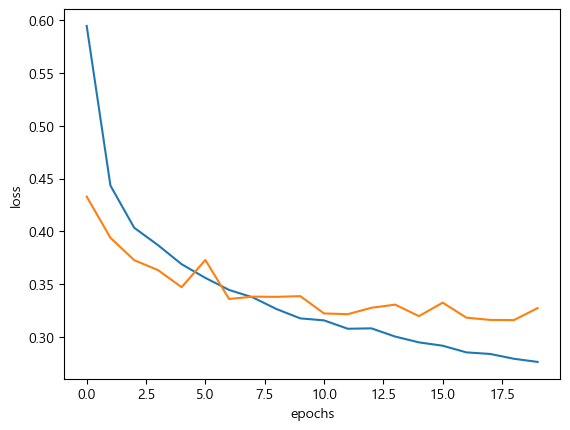

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

콜백 callbacks

In [15]:
# 손실률이 가장 낮은 위치의 모델을 저장시켜줌
# 확장자 h5 -> keras 확장자명이 변경
# epochs를 20번 돌 때 가장 좋은 모델을 저장시켜줌
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
history  = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.8994 - loss: 0.2712 - val_accuracy: 0.8802 - val_loss: 0.3267
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.9006 - loss: 0.2657 - val_accuracy: 0.8811 - val_loss: 0.3333
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.8962 - loss: 0.2743 - val_accuracy: 0.8859 - val_loss: 0.3287
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.8982 - loss: 0.2703 - val_accuracy: 0.8869 - val_loss: 0.3296
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.9032 - loss: 0.2614 - val_accuracy: 0.8880 - val_loss: 0.3229
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.9020 - loss: 0.2571 - val_accuracy: 0.8838 - val_loss: 0.3307
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9040 - loss: 0.2533 - val_accuracy: 0.8861 - val_loss: 0.3262
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.9022 -

In [21]:
model = keras.models.load_model('best_model.keras')
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8909 - loss: 0.3302


[0.34039798378944397, 0.8920000195503235]